In [25]:
import matplotlib.pyplot as plt
from freegs.machine import Coil, Solenoid, Machine
from freegs.jtor import ConstrainBetapIp
from freegs.equilibrium import Equilibrium
from freegs.control import constrain
from freegs import solve
from SOUTH_param import * 

In [ ]:
solenoid_height = 0.94
inner_radius = 51e-3
outer_radius = 60e-3
solenoid_turns = 104

R0 = 0.3048     # Middle of the circle
rwall = 0.16195 # Radius of the circular wall

npoints = 50 # Number of points on the wall

# Poloidal angles
thetas = np.linspace(0, 2*np.pi, npoints, endpoint=False)
Rwalls = R0 + rwall * np.cos(thetas)
Zwalls = rwall * np.sin(thetas)

walls = Wall(
    Rwalls,
    Zwalls
)

plasma_major_radius = 0.28

In [26]:
# Parameters subject to change 
PR1 = 0.2
PZ1 = 0.35
PR2 = 0.30
PZ2 = 0.275
PR3 = 0.50
PZ3 = 0.10

coils_positioning = [
    (PR1, PZ1),
    (PR2, PZ2),
    (PR3, PZ3)
]

Ip = 10e3  # Plasma current [Amps]
toroidal_magnetic_field_strength_at_plasma_centre = 0.125 # B_0

R1 = 75e-3
R2 = 550e-3

In [27]:
coils_positioning

[(0.22, 0.3), (0.4, 0.27), (0.52, 0.15)]

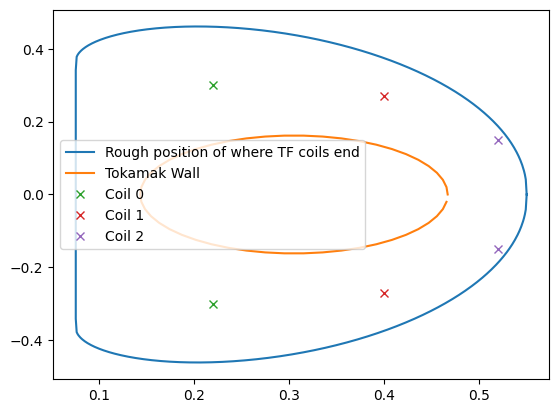

In [28]:
plt.plot(*PrincetonDee(R1, R2), label='Rough position of where TF coils end')
plt.plot(Rwalls, Zwalls, label='Tokamak Wall')

for index, (r, z) in enumerate(coils_positioning):
    plt.plot([r, r], [z, -z], 'x', label='Coil {}'.format(index))
plt.legend()

In [29]:
# Create coils
central_solenoid = [("SOL", Solenoid((inner_radius + outer_radius) / 2, -solenoid_height / 2,  solenoid_height / 2, solenoid_turns, control=False))]

poloidal_coils = [
    ("VF1_U", Coil(PR1, PZ1)),
    ("VF1_L", Coil(PR1, -PZ1)),
    ("VF2_U", Coil(PR2, PZ2)),
    ("VF2_L", Coil(PR2, -PZ2)),
    ("SH1_U", Coil(PR3, PZ3)),
    ("SH1_L", Coil(PR3, -PZ3))
]

In [30]:
# Create tokamak
tokamak = Machine(
    central_solenoid + poloidal_coils,
    walls
)
tokamak['VF1_U'].area = tokamak['VF1_L'].area = tokamak['VF2_U'].area = tokamak['VF2_L'].area = tokamak['SH1_U'].area = tokamak['SH1_L'].area = 4 * 2.1e-4

In [31]:
# Define simulation granularity
eq = Equilibrium(tokamak=tokamak,
                       Rmin=0.01, Rmax=0.7,    # Radial domain
                       Zmin=-0.6, Zmax=0.6,    # Height range
                       nx=129, ny=129          # Number of grid points
                       )

In [32]:
# Define plasma properties constraints
vacuum_toroidal_magnetic_field = plasma_major_radius * toroidal_magnetic_field_strength_at_plasma_centre
profiles = ConstrainBetapIp(eq,
                            0.05,   # Plasma poloidal beta
                            Ip,     # Plasma current [Amps]
                            vacuum_toroidal_magnetic_field)  # Vacuum f=R*Bt

In [33]:
# Define x-points and iso-flux
xpoints = [(0.3, -0.24), (0.3, 0.24)]  # (R,Z) locations of X-points
isoflux = [(0.3, -0.24, 0.3, 0.24)] # (R1,Z1, R2,Z2) pairs

constraints = constrain(xpoints=xpoints, isoflux=isoflux)

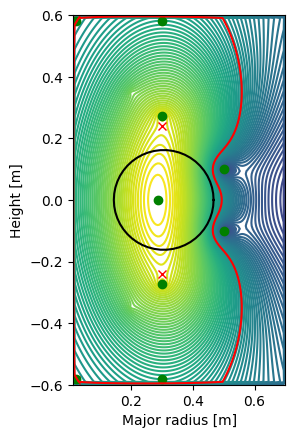

psi_relchange: 0.7229163430800426
bndry_relchange: 1.0
bndry_change: 0.6693823566708029


psi_relchange: 0.07843185149884577
bndry_relchange: 2265.814352642959
bndry_change: -0.6696779139450182


psi_relchange: 0.025567708238895752
bndry_relchange: 0.0072230455481934455
bndry_change: -2.15035577143881e-06


psi_relchange: 0.010235730160545383
bndry_relchange: 0.001379494221964387
bndry_change: -4.1125327692066987e-07


psi_relchange: 0.0047720709839442765
bndry_relchange: 0.0015561052708276649
bndry_change: -4.646273746865314e-07


psi_relchange: 0.0028465752324541424
bndry_relchange: 0.0014845871757560305
bndry_change: -4.439323069957467e-07


psi_relchange: 0.0020740133004909555
bndry_relchange: 0.0012667750856529083
bndry_change: -3.79280978343461e-07


psi_relchange: 0.001584990006147038
bndry_relchange: 0.0009759314673600299
bndry_change: -2.924858895997037e-07


psi_relchange: 0.0012215277532363297
bndry_relchange: 0.0007343204445657111
bndry_change: -2.2023698150423895e-07


psi

In [34]:
solve(eq,
             profiles,
             constraints,
             check_limited=True,
             limit_it = 0,
            show=True
             )
print(
    tokamak.getForces(),
    tokamak.printCurrents()
)

In [35]:
print(
    # eq.q(),
    eq.plasmaCurrent(), 
    eq.intersectsWall(), 
    eq.elongation(),
    # eq.elongationUpper(),
    # eq.elongationLower(), 
    eq.triangularity(),
    # eq.triangularityUpper(),
    # eq.triangularityLower()
)

10000.0 False 1.3857730709203815 -0.007298404626344004
